# Packages

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from scope_fun import plot_missing_values

# <center>Loading the Dataset</center>

In [90]:
data = pd.read_csv("./data/Github Repo Dataset.csv")
data.shape


(215029, 24)

There are $2,15,029$ observations and $24$ features in the dataset.

In [91]:
data.sample(5)


,Name,Description,URL,Created At,Updated At,Homepage,Size,Stars,Forks,Issues,Watchers,Language,License,Topics,Has Issues,Has Projects,Has Downloads,Has Wiki,Has Pages,Has Discussions,Is Fork,Is Archived,Is Template,Default Branch
79431,farmvibes-ai,FarmVibes.AI: Multi-Modal GeoSpatial ML Models...,https://github.com/microsoft/farmvibes-ai,2022-09-06T18:24:31Z,2023-09-24T14:04:44Z,https://microsoft.github.io/farmvibes-ai/,24544,527,78,13,527,Jupyter Notebook,MIT,"['agriculture', 'ai', 'geospatial', 'geospatia...",True,True,True,True,True,True,False,False,False,main
136106,NSC,Neural Sentiment Classification,https://github.com/thunlp/NSC,2016-08-30T05:03:07Z,2023-06-01T19:13:37Z,NaN,41,288,97,1,288,Python,MIT,['nlp'],True,True,True,True,False,False,False,False,False,master
200166,brutas,Wordlists handcrafted (and automated) with ♥,https://github.com/tasooshi/brutas,2020-02-04T01:02:06Z,2023-09-23T22:16:33Z,NaN,186716,182,21,0,182,Python,NaN,"['enum', 'enumeration', 'password-cracking', '...",True,True,True,True,False,False,False,False,False,master
99179,example-.io-game,An example multiplayer (.io) web game.,https://github.com/vzhou842/example-.io-game,2019-03-11T20:48:31Z,2023-09-16T21:20:06Z,https://example-io-game.victorzhou.com/,980,412,167,27,412,JavaScript,MIT,"['example-project', 'game', 'html5-game', 'io-...",True,True,True,True,False,False,False,False,False,master
453,gym,A toolkit for developing and comparing reinfor...,https://github.com/openai/gym,2016-04-27T14:59:16Z,2023-09-21T11:16:08Z,https://www.gymlibrary.dev,7113,32743,8589,71,32743,Python,NOASSERTION,[],True,True,True,True,False,False,False,False,False,master


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215029 entries, 0 to 215028
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Name             215027 non-null  object
 1   Description      206997 non-null  object
 2   URL              215029 non-null  object
 3   Created At       215029 non-null  object
 4   Updated At       215029 non-null  object
 5   Homepage         78390 non-null   object
 6   Size             215029 non-null  int64 
 7   Stars            215029 non-null  int64 
 8   Forks            215029 non-null  int64 
 9   Issues           215029 non-null  int64 
 10  Watchers         215029 non-null  int64 
 11  Language         198953 non-null  object
 12  License          161990 non-null  object
 13  Topics           215029 non-null  object
 14  Has Issues       215029 non-null  bool  
 15  Has Projects     215029 non-null  bool  
 16  Has Downloads    215029 non-null  bool  
 17  Has Wiki  

There 9 boolean features, 5 integer feature and 10 object or string features.

In [93]:
data.duplicated().sum()

0

There are 0 duplicate rows

In [94]:
data.describe(include='int64').T


,count,mean,std,min,25%,50%,75%,max
Size,215029.0,54282.700106,702397.849095,0.0,378.0,2389.0,15282.0,105078627.0
Stars,215029.0,1115.085142,3992.372050,167.0,237.0,377.0,797.0,374074.0
Forks,215029.0,234.207637,1242.967451,0.0,39.0,79.0,174.0,243339.0
Issues,215029.0,37.925178,196.508610,0.0,3.0,10.0,28.0,26543.0
Watchers,215029.0,1115.085142,3992.372050,167.0,237.0,377.0,797.0,374074.0


The max value of all feature is very large compared to its quartile, indicating outliers are present.

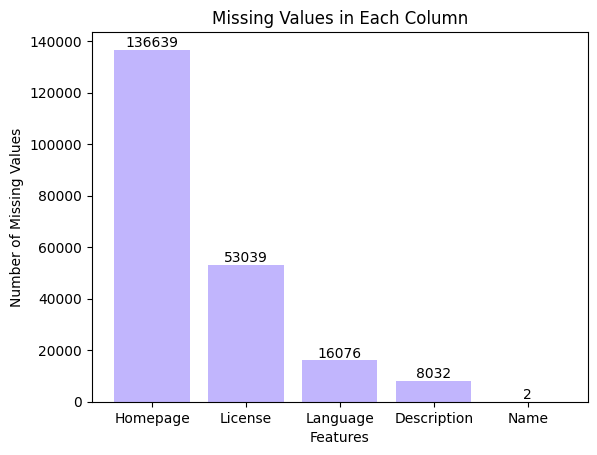

In [95]:
plot_missing_values(data)

Only object features have missing values in them.

We will create a copy of the dataset for working.

In [96]:
df = data.copy()

As some features of spaces in their names,  we would rename the features.

In [97]:
col_map = {
    'Created At':'CreationDate', 
    'Updated At':'LastUpdatedOn',
    'Has Issues':'HasIssues', 
    'Has Wiki':'HasWiki', 
    'Has Projects':'HasProjects',
    'Has Pages':'HasPages', 
    'Has Downloads':'HasDownloads',
    'Has Discussions':'HasDiscussions', 
    'Is Fork':'IsForked', 
    'Is Archived':'IsArchived',
    'Is Template':'IsTemplate',
    'Default Branch':'DefaultBranch'
}

df.rename(columns=col_map,inplace=True)


As the data is huge to increase the processing we would change the `int64` datatype to `int32`, if and only if the summary of the data inside remains the same

In [98]:
temp = df.select_dtypes('int64').describe()

In [99]:
int64_columns = df.select_dtypes('int64').columns

In [100]:
df_test = df[int64_columns].astype('int32')
df_test.describe() == temp

,Size,Stars,Forks,Issues,Watchers
count,True,True,True,True,True
mean,True,True,True,True,True
std,True,True,True,True,True
min,True,True,True,True,True
25%,True,True,True,True,True
50%,True,True,True,True,True
75%,True,True,True,True,True
max,True,True,True,True,True


So we change the datatypes.

In [101]:
df[int64_columns] = df[int64_columns].astype('int32')

# <center>Handling Missing Values</center>

Features with null values
- Homepage
- License
- Language
- Description
- Name

All of them are of object datatype, to analyze them we would require NLP techniques. Therefore we would drop all these columns.

In [102]:
null_features = ['Homepage','License','Language','Name','Description']

In [103]:
df[null_features].sample(10)


,Homepage,License,Language,Name,Description
43223,NaN,NaN,C,PS4-SDK,Open source PS4 SDK
190065,NaN,NaN,C,xbee_ansic_library,A collection of portable ANSI C code for commu...
76797,NaN,BSD-3-Clause,Go,dms,A UPnP DLNA Digital Media Server that includes...
66322,NaN,NaN,NaN,Grouper2,Find vulnerabilities in AD Group Policy
160635,NaN,NaN,C++,ConvNet,Convolutional Neural Networks for Matlab for c...
110015,NaN,CC0-1.0,NaN,awesome-password-cracking,"A curated list of awesome tools, research, pap..."
176953,http://cloud.spring.io/spring-cloud-dataflow/,NaN,Java,spring-cloud-dataflow-samples,Sample starter applications and code for use w...
34914,NaN,Apache-2.0,Java,spark,A simple Android sparkline chart view.
174665,https://chrome.google.com/webstore/detail/my-n...,MIT,TypeScript,my-notes,Simple and fast note-taking in Chrome with Goo...
44817,NaN,MIT,C#,Automatic-DynamicBone,"unity bone cloth spring system,base by jobs"


In [104]:
df[null_features].isna().sum()

Homepage       136639
License         53039
Language        16076
Name                2
Description      8032
dtype: int64

In [105]:
df[null_features].isna().sum() * 100 / df.shape[0]

Homepage       63.544452
License        24.665975
Language        7.476201
Name            0.000930
Description     3.735310
dtype: float64

##  Dropping

Reasons
- Missing values can only be be filled using web scraping.
- The number of missing values are too large in some features
- These can only analyzed properly using NLP Technique which beyond my current skills and project scope.

In [106]:
null_features

['Homepage', 'License', 'Language', 'Name', 'Description']

### Dropping Columns
- Homepage
- License


In [107]:
df = df.drop(['Homepage','License'],axis=1)
null_features.remove('Homepage')
null_features.remove('License')

## Dropping Rows 

$(\text{Total Data Loss:} 11.22\%)$

- Language
- Name
- Description

<span style="color:grey">This feature has small number of missing values.</span>

In [108]:
null_features

['Language', 'Name', 'Description']

In [109]:
df.dropna(inplace=True)

In [110]:
all(df.isna().sum() > 0)

False

# <center> Outliers </center>
<span style='color:red'>(Integer Columns Only)</span>


In [111]:
df.select_dtypes('int32').head()


,Size,Stars,Forks,Issues,Watchers
0,387451,374074,33599,248,374074
5,5088,256615,29254,191,256615
6,2267461,251416,34927,643,251416
7,11187,229569,40474,393,229569
9,345964,213299,44842,1497,213299


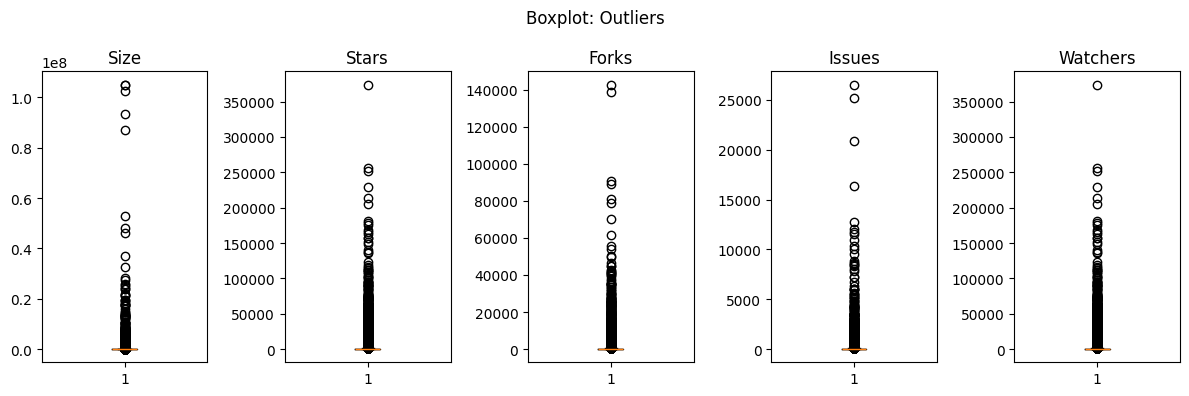

In [112]:
fig, axes = plt.subplots(nrows=1,ncols=5, figsize=(12, 4))
for i,f in enumerate(df.select_dtypes('int32')):
    axes[i].boxplot(df[f])
    axes[i].set_title(f)
fig.suptitle("Boxplot: Outliers")
plt.tight_layout()
# plt.axis('off')

Outliers are present in all numeric features, we will process the features by replacing outlier with lower fence and upper fence value which is derived using the quartiles

In [113]:
# Function to remove Outliers
def remove_outliers(dataFrame, col):
    Q1 = dataFrame[col].quantile(0.25)
    Q3 = dataFrame[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    if dataFrame[col].dtype == 'int32':
        lower_fence, upper_fence = int(lower_fence), int(upper_fence)

    outliers = dataFrame[col].where(
        (dataFrame[col] < lower_fence) & (dataFrame[col] > upper_fence))

    status = 'Removed'
    try:
        for i, d in dataFrame.iterrows():
            if d[col] < lower_fence:
                df.at[i, col] = lower_fence
            elif d[col] > upper_fence:
                df.at[i, col] = upper_fence
    except:
        status = 'Not Removed'
    finally:
        print(f"{col:<10}{status:>10}")


In [114]:
#! Takes long time
print(f"{'Column':<10}{'Status':>10}")
for c in df.select_dtypes('int32'):
    remove_outliers(df, c)


Column        Status


Size         Removed
Stars        Removed
Forks        Removed
Issues       Removed
Watchers     Removed


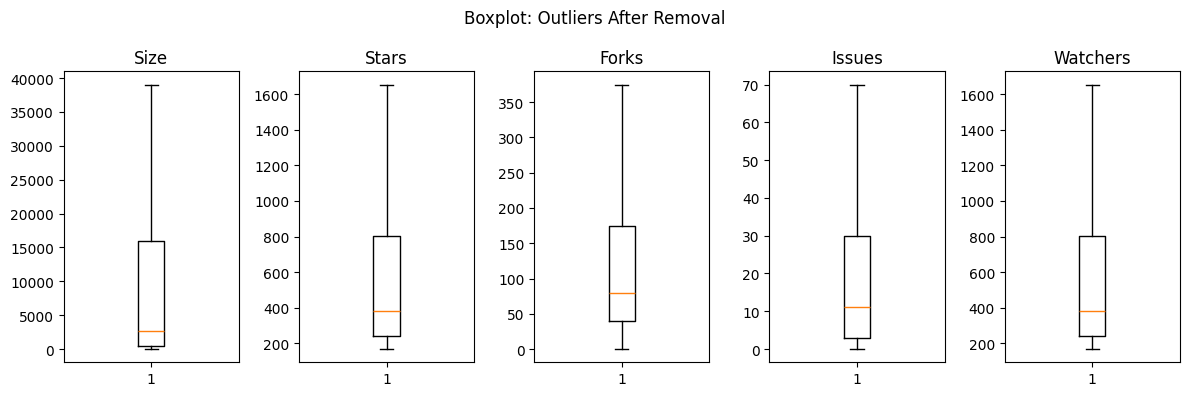

In [115]:
fig, axes = plt.subplots(nrows=1,ncols=5, figsize=(12, 4))
for i,f in enumerate(df.select_dtypes('int32')):
    axes[i].boxplot(df[f])
    axes[i].set_title(f)
fig.suptitle("Boxplot: Outliers After Removal")
plt.tight_layout()
# plt.axis('off')

# <center>EDA</center>

## Categorical Features

In [116]:
df.select_dtypes('object').head()


,Name,Description,URL,CreationDate,LastUpdatedOn,Language,Topics,DefaultBranch
0,freeCodeCamp,freeCodeCamp.org's open-source codebase and cu...,https://github.com/freeCodeCamp/freeCodeCamp,2014-12-24T17:49:19Z,2023-09-21T11:32:33Z,TypeScript,"['careers', 'certification', 'community', 'cur...",main
5,public-apis,A collective list of free APIs,https://github.com/public-apis/public-apis,2016-03-20T23:49:42Z,2023-09-21T11:22:06Z,Python,"['api', 'apis', 'dataset', 'development', 'fre...",master
6,developer-roadmap,"Interactive roadmaps, guides and other educati...",https://github.com/kamranahmedse/developer-roa...,2017-03-15T13:45:52Z,2023-09-21T11:32:17Z,TypeScript,"['angular-roadmap', 'backend-roadmap', 'blockc...",master
7,system-design-primer,Learn how to design large-scale systems. Prep ...,https://github.com/donnemartin/system-design-p...,2017-02-26T16:15:28Z,2023-09-21T11:32:17Z,Python,"['design', 'design-patterns', 'design-system',...",master
9,react,The library for web and native user interfaces,https://github.com/facebook/react,2013-05-24T16:15:54Z,2023-09-21T11:37:15Z,JavaScript,"['declarative', 'frontend', 'javascript', 'lib...",main


## Dropping Some Features

In [117]:
drop_cat = []

`Name`

In [118]:
df[['Name']].head()

,Name
0,freeCodeCamp
5,public-apis
6,developer-roadmap
7,system-design-primer
9,react


It just contains `Name` of the repository which doesn't contribute to the popularity.

In [119]:
drop_cat.append('Name')

`Description`

In [120]:
df['Description'].head()

0    freeCodeCamp.org's open-source codebase and cu...
5                       A collective list of free APIs
6    Interactive roadmaps, guides and other educati...
7    Learn how to design large-scale systems. Prep ...
9       The library for web and native user interfaces
Name: Description, dtype: object

We will need to make any sense from the description, so we will drop `Description` but keep the number of words as a new feature

In [121]:
from scope_fun import count_description

In [122]:
#! Takes a Long Time To Run
for i,d in df.iterrows():
    df.at[i,'DescSize'] = count_description(d['Description'])

In [123]:
df[['Description','DescSize']].sample(5)

,Description,DescSize
209496,Realm extension library used to create more ty...,7.0
137664,Appium UiAutomator/UiObject2-based server for ...,11.0
148600,C++ Cheat Sheet for ACM ICPC,5.0
114651,PowerLoaderEx - Advanced Code Injection Techni...,7.0
168520,Unreal Engine Example projects. Includes UE4 ...,8.0


In [124]:
df[['DescSize']].describe().T

,count,mean,std,min,25%,50%,75%,max
DescSize,192060.0,7.517791,24.157894,0.0,4.0,6.0,9.0,7751.0


In [125]:
drop_cat.append('Description')

`Default Branch`

In [126]:
(df['DefaultBranch'].value_counts() * 100 / df.shape[0]).sort_values(ascending=False)

DefaultBranch
master             76.098094
main               18.485890
develop             1.709882
dev                 0.632615
gh-pages            0.408726
                     ...    
git_hub             0.000521
bspwm               0.000521
point               0.000521
sb-trunk-oldxul     0.000521
branch2.0           0.000521
Name: count, Length: 2124, dtype: float64

We can see that in general users name their default branch as `master` and `main` which are the default branch one get on git init. As such there is not much information in this feature.

<span style='color:red'>So we will drop `Default Branch`</span>

In [127]:
drop_cat.append("DefaultBranch")

`URL`

In [128]:
df['URL'].sample(10)

128153            https://github.com/VictorTaelin/PureState
119775        https://github.com/daeh/zotero-markdb-connect
6891         https://github.com/spatie/laravel-medialibrary
38248                 https://github.com/dtrace4linux/linux
936       https://github.com/javascript-tutorial/en.java...
34752                https://github.com/dhondta/dronesploit
99098       https://github.com/WenkaiZhou/DelegationAdapter
22018                      https://github.com/snort3/snort3
82213        https://github.com/YosysHQ/oss-cad-suite-build
76813           https://github.com/elastic/apm-agent-dotnet
Name: URL, dtype: object

<span style='color:red'>We will drop `URL`</span>

Reasons:
1. NLP Needed
2. A `URL` is associated to most Repository, which is true as there was no missing values in it.
3. Information that can be possibly extracted from these would be repository name, user name or in rare case names of the company. This is already available in `Name` Feature


In [129]:
drop_cat.append("URL")

`Topics`

In [130]:
(df['Topics'].value_counts() * 100 / df.shape[0]).sort_values(ascending=False)

Topics
[]                                                                                                                                                                                    44.792252
['hacktoberfest']                                                                                                                                                                      0.215558
['python']                                                                                                                                                                             0.025513
['component', 'php', 'symfony', 'symfony-component']                                                                                                                                   0.022389
['android']                                                                                                                                                                            0.019265
                                 

Around $44.79\%$ of values in `Topics` are just empty lists, which are missing values and therefore didn't showed up previously.

We can extract the number of unique topics in per repository but the missing values count is too large for such imputation.

<span style='color:red'>Hence, we will drop `Topics`</span>

In [131]:
drop_cat.append('Topics')

`CreatedDate` & `LastUpdatedOn`

In [132]:
df[['CreationDate','LastUpdatedOn']].head()

,CreationDate,LastUpdatedOn
0,2014-12-24T17:49:19Z,2023-09-21T11:32:33Z
5,2016-03-20T23:49:42Z,2023-09-21T11:22:06Z
6,2017-03-15T13:45:52Z,2023-09-21T11:32:17Z
7,2017-02-26T16:15:28Z,2023-09-21T11:32:17Z
9,2013-05-24T16:15:54Z,2023-09-21T11:37:15Z


We will first convert from timestamp format to date time format of pandas

In [133]:
# Convert date to datetime and extract `year`
df['CreationDate'] = pd.to_datetime(df['CreationDate'])
df['LastUpdatedOn'] = pd.to_datetime(df['LastUpdatedOn'])


We will extract the years from the date

In [134]:
df['CreatedYear'] = pd.DatetimeIndex(df['CreationDate']).year
df['UpdatedYear'] = pd.DatetimeIndex(df['LastUpdatedOn']).year


In [135]:
df[['UpdatedYear','CreatedYear']].describe().T

,count,mean,std,min,25%,50%,75%,max
UpdatedYear,192060.0,2022.992419,0.098858,2019.0,2023.0,2023.0,2023.0,2023.0
CreatedYear,192060.0,2016.730131,3.227379,2007.0,2014.0,2017.0,2019.0,2023.0


Now we will create a new features called 
- `Maintained`, by subtracting the current year from `UpdatedYear` to see if the person has updated the code recently.
- `Age`, by subtracting the current year from `CreatedYear`, to see how old the repository is.

In [136]:
df['Maintained'] = 2023 - df['UpdatedYear']
df[['Maintained']].describe().T

,count,mean,std,min,25%,50%,75%,max
Maintained,192060.0,0.007581,0.098858,0.0,0.0,0.0,0.0,4.0


In [137]:
df['Age'] = 2023 - df['CreatedYear']
df[['Age']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,192060.0,6.269869,3.227379,0.0,4.0,6.0,9.0,16.0


In [138]:
drop_cat.append("CreationDate")
drop_cat.append("LastUpdatedOn")

`Language`

For language, I will try to create category according to the usage of these language in the repository.

In [139]:
lang = df[['Language']].value_counts()
lang.sort_values(ascending=False)

Language  
Python        32931
JavaScript    30880
Java          14750
TypeScript    11321
C++           10940
              ...  
Ballerina         1
eC                1
hoon              1
BASIC             1
wisp              1
Name: count, Length: 363, dtype: int64

Plotting language according to their usage

In [55]:
count_lang = df['Language'].value_counts().sort_values(ascending=False)
px.bar(x=count_lang.index, y=count_lang).update_layout(xaxis_title='Languages',yaxis_title='Count',title='Which Language was used how much ?')

As we can see that the above plot is highly positively skewed, dropping some values won't affect the data. As the the number of missing values is low in this feature we will drop all missing values

We will consider this data to discern which language that the repoistory used were popular.

This data is based from **StackOverFlow Survey 2023** was taken from [Statista](https://www.statista.com/statistics/793628/worldwide-developer-survey-most-used-languages/). It contains the top 50 languages of 2023

In [56]:
top50_lang = pd.read_csv("data/programming-languages-2023.csv")
px.bar(x=top50_lang.Language, y=top50_lang.Percentage).update_layout(xaxis_title='Language',yaxis_title='Percentage',title='Popular Languages of 2023')

In [140]:
popular_lang = list(top50_lang.Language)
for i, d in df.iterrows():
    if d['Language'] in popular_lang:
            df.at[i, 'IsPopularLang'] = True
    else:
          df.at[i,'IsPopularLang'] = False


In [141]:
df["IsPopularLang"] = df['IsPopularLang'].astype("bool")

In [142]:
df[['Language','IsPopularLang']].sample(7)


,Language,IsPopularLang
88988,Python,True
78183,JavaScript,True
213206,C++,True
92022,C#,True
197484,JavaScript,True
188059,TypeScript,True
29160,Python,True


In [143]:
drop_cat.append('Language')

### Dropping Categorical Feature

In [144]:
df.drop(drop_cat,inplace=True,axis=1)

## Numeric Features

In [145]:
df.select_dtypes(['int32','int64'])

,Size,Stars,Forks,Issues,Watchers,CreatedYear,UpdatedYear,Maintained,Age
0,39041,1655,375,70,1655,2014,2023,0,9
5,5088,1655,375,70,1655,2016,2023,0,7
6,39041,1655,375,70,1655,2017,2023,0,6
7,11187,1655,375,70,1655,2017,2023,0,6
9,39041,1655,375,70,1655,2013,2023,0,10
...,...,...,...,...,...,...,...,...,...
215023,1693,167,18,0,167,2011,2022,1,12
215024,573,167,73,11,167,2010,2023,0,13
215025,2219,167,36,2,167,2014,2022,1,9
215027,15617,167,24,4,167,2013,2022,1,10


In [146]:
int_feat = list(df.select_dtypes(['int32','int64']).columns)
int_feat.remove('UpdatedYear')
int_feat.remove('CreatedYear')
int_feat

['Size', 'Stars', 'Forks', 'Issues', 'Watchers', 'Maintained', 'Age']

In [147]:
corr_mat_int = df[int_feat].corr(method='pearson')
px.imshow(
    corr_mat_int,
    text_auto=True,
    aspect='auto',
    color_continuous_scale='purp'
)

High Correlation Between

<span style="color:lightgreen">
Positive
<li>Forks, Watchers</li>
<li>Forks, Stars</li>
</span>

There also exists a correlation of $1$ between `Watchers` and `Stars`, hence we can keep either one. We will keep `Stars` and **drop `Watchers`**



Since none of the other features have correlation of above 0.9 and 0.8, we won't have to drop this features.

In [148]:
df.drop('Watchers',axis=1,inplace=True)
int_feat.remove('Watchers')

### Normalization

In [68]:
df[int_feat].describe().T

,count,mean,std,min,25%,50%,75%,max
Size,192060.0,10545.687900,14253.145036,0.0,448.0,2629.5,15885.25,39041.0
Stars,192060.0,609.822269,500.560688,167.0,238.0,380.0,805.00,1655.0
Forks,192060.0,126.035395,116.208610,0.0,40.0,79.0,174.00,375.0
Issues,192060.0,20.740602,23.086981,0.0,3.0,11.0,30.00,70.0
Maintained,192060.0,0.007581,0.098858,0.0,0.0,0.0,0.00,4.0
Age,192060.0,6.269869,3.227379,0.0,4.0,6.0,9.00,16.0


We would apply `yeojohnson` transformation on features which have zero value in them, on rest we would go with `boxcox`.

In [69]:
from scipy.stats import yeojohnson, boxcox

In [70]:
df_test = df.copy()
for f in int_feat:
    if min(df_test[f]) <= 0:
        td, lv = yeojohnson(df_test[f])
    else:
        td,lv = boxcox(df_test[f])
    df_test[f] = td


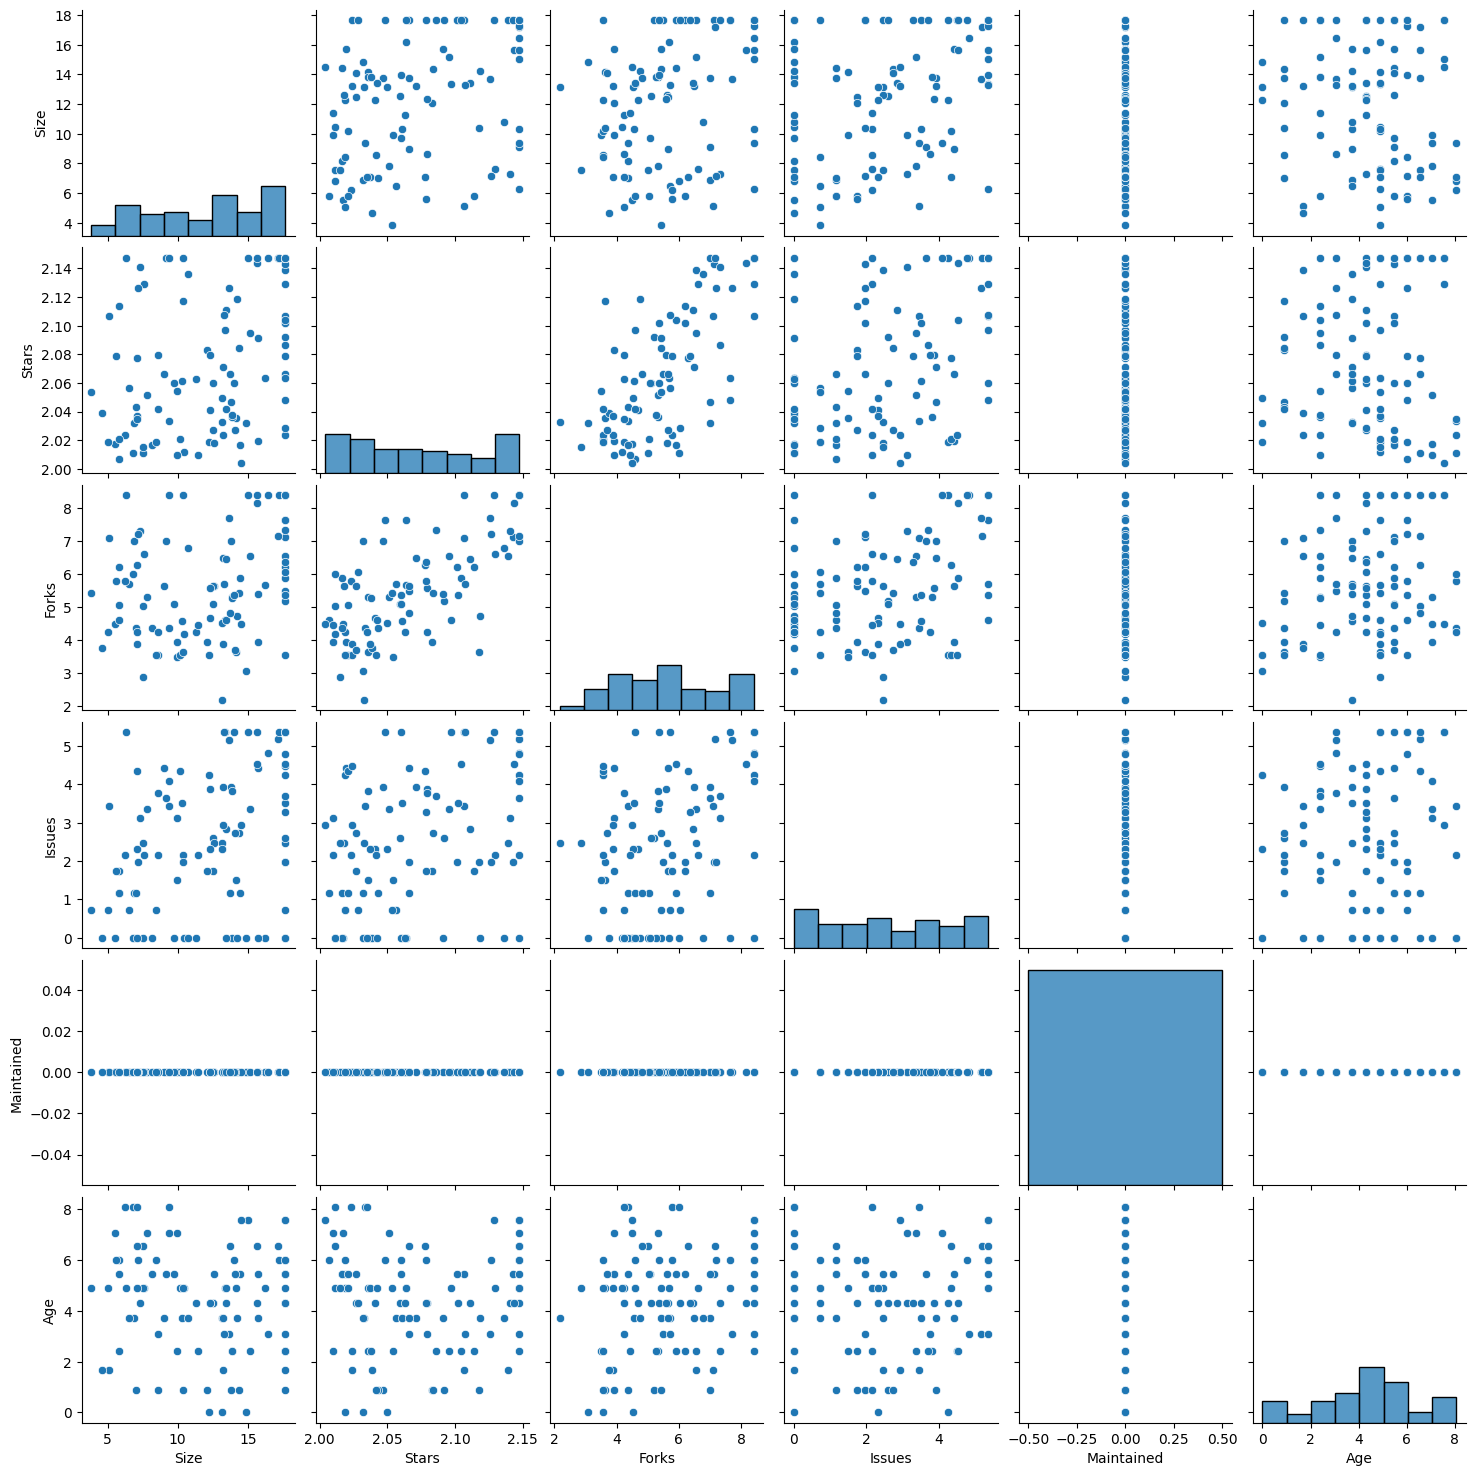

In [71]:
sns.pairplot(df_test[int_feat].sample(100))

<span style="color:red">So we won't use normalized data, as even after transformation data doesn't follow normal distribution.</span>

### Taking PCA of Integer Features

In [72]:
from sklearn.decomposition import PCA

In [73]:
scaler = StandardScaler()
int_scaled = scaler.fit_transform(df[int_feat])

In [74]:
pca_int = PCA()
compnents_int = pca_int.fit_transform(int_scaled)
labels = {
    str(i): f"PC {i+1} ({var:1f})" for i, var in enumerate(pca_int.explained_variance_ratio_ *100)
}


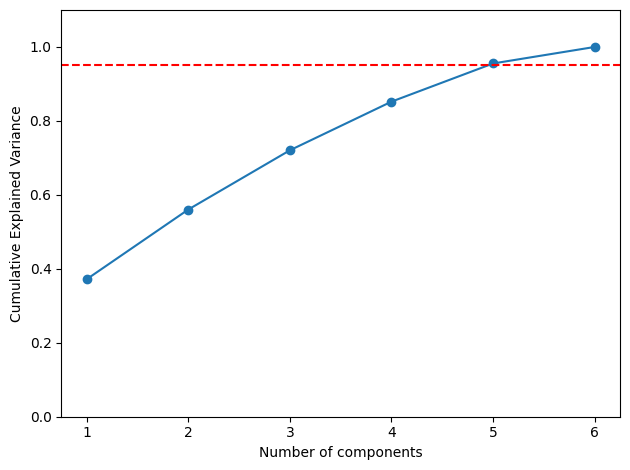

In [75]:
cumsum_pca_int = np.cumsum(pca_int.explained_variance_ratio_)
xi = range(1, len(cumsum_pca_int)+1)

plt.plot(xi, cumsum_pca_int,marker='o',linestyle='-')
plt.ylim(0.0,1.1)
plt.xlabel('Number of components')
plt.ylabel("Cumulative Explained Variance")
plt.xticks(xi)
plt.axhline(y=0.95, color='r',linestyle='--')
plt.tight_layout()


In [76]:
labels

{'0': 'PC 1 (37.181646)',
 '1': 'PC 2 (18.850436)',
 '2': 'PC 3 (16.022620)',
 '3': 'PC 4 (13.152588)',
 '4': 'PC 5 (10.329507)',
 '5': 'PC 6 (4.463203)'}

We won't consider taking PCA, as the number of column been reduced is not that significant plus the information contain in each PCA is very less.

## Boolean Features

In [149]:
bool_feat = df.select_dtypes('bool')
bool_feat

,HasIssues,HasProjects,HasDownloads,HasWiki,HasPages,HasDiscussions,IsForked,IsArchived,IsTemplate,IsPopularLang
0,True,True,True,False,True,False,False,False,False,True
5,True,False,True,False,False,False,False,False,False,True
6,True,False,True,True,True,False,False,False,False,True
7,True,True,True,True,False,False,False,False,False,True
9,True,True,True,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
215023,True,True,True,True,False,False,False,False,False,True
215024,True,True,False,True,False,False,False,False,False,True
215025,True,True,True,True,False,False,False,False,False,True
215027,True,True,True,True,False,False,False,False,False,True


In [150]:
corr_mat_bool = bool_feat.corr()
px.imshow(
    corr_mat_bool,
    text_auto=True,
    aspect='auto',
    color_continuous_scale='purp'
)

High Correlation Between

<span style='color:lightgreen'>
Positive
<li>HasProjects, HasWiki</li>
</span> 

In [151]:
df['IsForked'].value_counts()

IsForked
False    192060
Name: count, dtype: int64

<span style='color:red'>We will drop `IsForked` because it only contains `False` values</span>

In [152]:
df.drop('IsForked',axis=1,inplace=True)

# Encoding

In [153]:
df.head()

,Size,Stars,Forks,Issues,HasIssues,HasProjects,HasDownloads,HasWiki,HasPages,HasDiscussions,IsArchived,IsTemplate,DescSize,CreatedYear,UpdatedYear,Maintained,Age,IsPopularLang
0,39041,1655,375,70,True,True,True,False,True,False,False,False,8.0,2014,2023,0,9,True
5,5088,1655,375,70,True,False,True,False,False,False,False,False,5.0,2016,2023,0,7,True
6,39041,1655,375,70,True,False,True,True,True,False,False,False,9.0,2017,2023,0,6,True
7,11187,1655,375,70,True,True,True,True,False,False,False,False,11.0,2017,2023,0,6,True
9,39041,1655,375,70,True,True,True,True,True,False,False,False,6.0,2013,2023,0,10,True


In [154]:
df.shape

(192060, 18)

In [155]:
df.sample(1)

,Size,Stars,Forks,Issues,HasIssues,HasProjects,HasDownloads,HasWiki,HasPages,HasDiscussions,IsArchived,IsTemplate,DescSize,CreatedYear,UpdatedYear,Maintained,Age,IsPopularLang
40717,411,1070,202,42,True,True,True,False,False,False,False,False,11.0,2015,2023,0,8,True


In [156]:
bool_col = df.select_dtypes('bool').columns
df[bool_col] = df.select_dtypes('bool').astype('int32')
df[bool_col].head()

,HasIssues,HasProjects,HasDownloads,HasWiki,HasPages,HasDiscussions,IsArchived,IsTemplate,IsPopularLang
0,1,1,1,0,1,0,0,0,1
5,1,0,1,0,0,0,0,0,1
6,1,0,1,1,1,0,0,0,1
7,1,1,1,1,0,0,0,0,1
9,1,1,1,1,1,0,0,0,1


# Saving the Clean Data

In [157]:
df.sample(1)

,Size,Stars,Forks,Issues,HasIssues,HasProjects,HasDownloads,HasWiki,HasPages,HasDiscussions,IsArchived,IsTemplate,DescSize,CreatedYear,UpdatedYear,Maintained,Age,IsPopularLang
30047,6669,1471,315,1,1,1,1,1,1,0,0,0,6.0,2014,2023,0,9,1


In [158]:
df_clean = df.drop(['CreatedYear','UpdatedYear','IsArchived','IsTemplate','HasProjects'] ,axis=1)

In [159]:
df_clean.shape

(192060, 13)

In [161]:
all(df_clean.isna().sum() == 0)

True

In [101]:
df_clean.to_csv("./data/CleanGithubRepo_final.csv",index=False)

---